In [5]:
import os 
from pathlib import Path
import pandas as pd 
import re
import utils
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
from sklearn.metrics import f1_score

In [6]:
#Se leen los datos y se seleccionan las variables que presentan una diferencia
# entre los individuos que presentan estres y los que no
data_path = Path(os.getcwd()).parent / "data"
silver_path = data_path / "silver" / "dreadditCleanTest.csv"
df = pd.read_csv(silver_path)

In [7]:
#Configuracion de visualizaciones 

# Configurar el estilo de fondo con una cuadrícula
sns.set_style("whitegrid")

# Establecer una paleta de colores profesional
sns.set_palette(['#2596be'])

# Configurar la tipografía y el tamaño de la fuente
sns.set_context("paper", font_scale=1.5, rc={"font.family": "sans-serif", "font.sans-serif": ["Helvetica", "Arial"]})

# Desactivar spines innecesarios
sns.despine(trim=True, left=True);

<Figure size 640x480 with 0 Axes>

In [8]:
scores = {}


#### Caracteristicas extraidas a mano

In [9]:
X = df[["singular_pronouns","adj_adv"]]
y = df.label

In [10]:
models_path = Path(os.getcwd()).parent / "models"


# Lista para almacenar los nombres de archivos
pkl_files = []

# Recorre todos los archivos en el directorio especificado
for filename in os.listdir(models_path):
    if (filename.endswith('.pkl') & ("manual" in filename)):
        pkl_files.append(filename)

for model_name in pkl_files:
    ruta = os.path.join(models_path,model_name)
    # Cargar el modelo
    with open(ruta, 'rb') as file:
        model = pickle.load(file)

    f1s= np.round(utils.evaluate_model(model, X,y).mean(),3)
    scores[model_name.split(".")[0]] = f1s

c:\Users\franc.FJMOYAO\miniconda3\envs\tesis\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\franc.FJMOYAO\miniconda3\envs\tesis\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\franc.FJMOYAO\miniconda3\envs\tesis\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator GradientBoostin

#### Solo TF-IDF

In [11]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 3), 
                        stop_words='english')

features = tfidf.fit_transform(df["clean_text"]).toarray()

X,y = pd.DataFrame(features),df.label

In [12]:
# Lista para almacenar los nombres de archivos
pkl_files = []

# Recorre todos los archivos en el directorio especificado
for filename in os.listdir(models_path):
    if (filename.endswith('.pkl') & ("TFIDF" in filename)):
        pkl_files.append(filename)

for model_name in pkl_files:
    ruta = os.path.join(models_path,model_name)
    # Cargar el modelo
    with open(ruta, 'rb') as file:
        model = pickle.load(file)

    f1s= np.round(utils.evaluate_model(model, X,y).mean(),3)
    scores[model_name.split(".")[0]] = f1s

c:\Users\franc.FJMOYAO\miniconda3\envs\tesis\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\franc.FJMOYAO\miniconda3\envs\tesis\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\franc.FJMOYAO\miniconda3\envs\tesis\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator GradientBoostin

#### Both

In [13]:
features = tfidf.fit_transform(df["clean_text"]).toarray()

X,y = pd.DataFrame(features),df.label

X['singular_pronouns'] = df['singular_pronouns']
X['adj_adv'] = df['adj_adv']

In [14]:
# Lista para almacenar los nombres de archivos
pkl_files = []

# Recorre todos los archivos en el directorio especificado
for filename in os.listdir(models_path):
    if (filename.endswith('.pkl') & ("both" in filename)):
        pkl_files.append(filename)

for model_name in pkl_files:
    ruta = os.path.join(models_path,model_name)
    # Cargar el modelo
    with open(ruta, 'rb') as file:
        model = pickle.load(file)

    f1s= np.round(utils.evaluate_model(model, X.values,y).mean(),3)
    scores[model_name.split(".")[0]] = f1s

c:\Users\franc.FJMOYAO\miniconda3\envs\tesis\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\franc.FJMOYAO\miniconda3\envs\tesis\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\franc.FJMOYAO\miniconda3\envs\tesis\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator GradientBoostin

#### RoBERTa

In [15]:
rmodel = os.path.join(models_path,"saved_roberta_model")


In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model_path = rmodel
tokenizer = RobertaTokenizer.from_pretrained(model_path)
model = RobertaForSequenceClassification.from_pretrained(model_path)
model.to(device);


In [17]:
res= df.text.apply(utils.make_prediction,args=(model,tokenizer, device))

In [18]:
y = df.label 
y_pred =res.apply(lambda x: x[1])

In [19]:
scores["RoBERTa"] = f1_score(y, y_pred)

In [20]:
scores = pd.DataFrame.from_dict(scores, orient="index").reset_index()
scores.columns=["model","fscore"]


In [21]:
scores = scores.sort_values("fscore", ascending=False)

C:\Users\franc.FJMOYAO\AppData\Local\Temp\ipykernel_22176\1855271777.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="fscore",y="model",data=scores, palette=colors_pal)


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

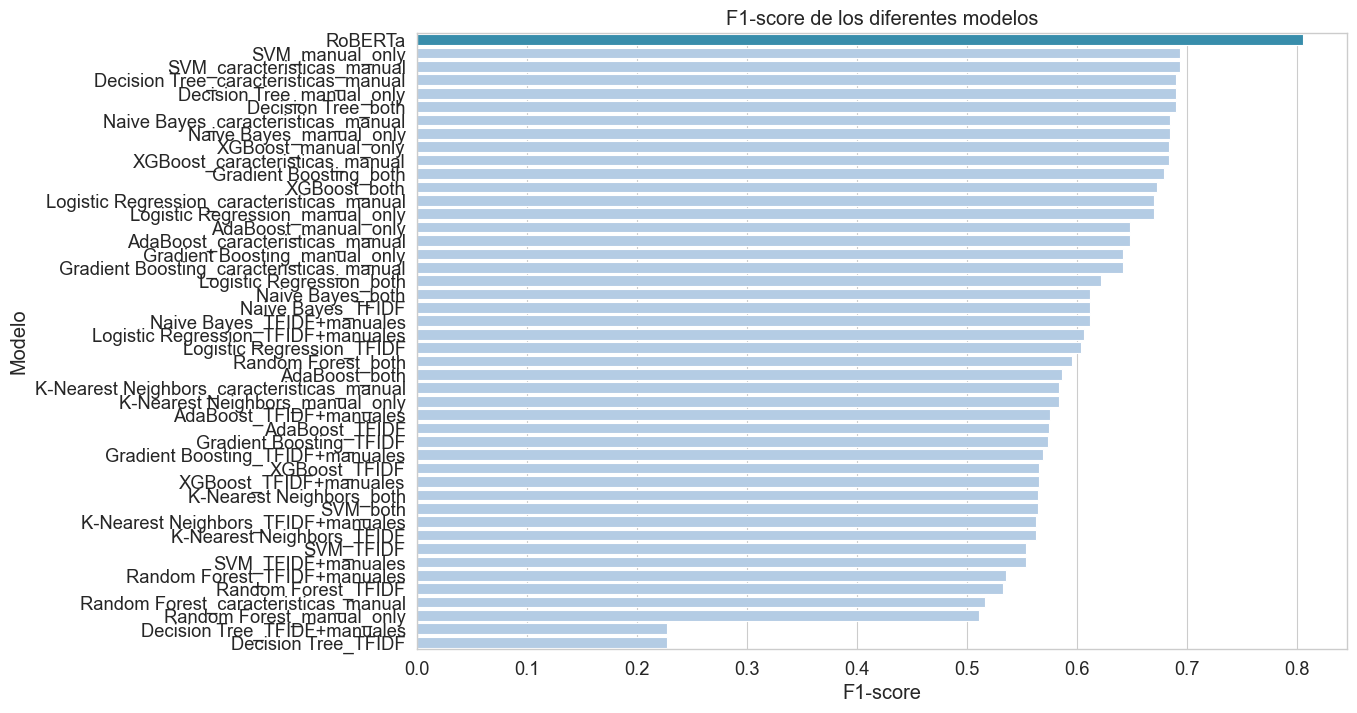

In [22]:

# Palabras que deben tener un color especial
special_words = ['RoBERTa']

# Función para aplicar colores
def assign_colors(words, special_words, color_special, color_default):
    return [color_special if word in special_words else color_default for word in words]

# Colores por defecto y especial
default_color = '#acccec'  # Azul por defecto
special_color = '#2596be'  

# Aplicar la función de asignación de colores
colors_pal = assign_colors(scores['model'], special_words, special_color, default_color)

fig, axes = plt.subplots(figsize=(12, 8))
plt.title("F1-score de los diferentes modelos")
sns.barplot(x="fscore",y="model",data=scores, palette=colors_pal)
plt.xlabel("F1-score")
plt.ylabel("Modelo")
plt.tight_layout

In [23]:
scores

,model,fscore
45,RoBERTa,0.804938
22,SVM_manual_only,0.693000
21,SVM_caracteristicas_manual,0.693000
3,Decision Tree_caracteristicas_manual,0.690000
4,Decision Tree_manual_only,0.690000
37,Decision Tree_both,0.690000
15,Naive Bayes_caracteristicas_manual,0.684000
16,Naive Bayes_manual_only,0.684000
25,XGBoost_manual_only,0.683000
24,XGBoost_caracteristicas_manual,0.683000
